<a href="https://colab.research.google.com/github/quastarK/Tensorflow_colab/blob/Tensorflow-2.0-%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B8%B0%EC%B4%88/3_%EC%A6%89%EC%8B%9C%EC%8B%A4%ED%96%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 즉시 실행

텐서플로의 즉시 실행은 그래프를 생성하지 않고 함수를 바로 실행하는 명령형 프로그래밍 환경 나중에 실행하기 위해 계산가능한 그래프를 생성하는 대신에 계산값을 즉시 알려주는 연산

이러한 기능은 텐서플로를 시작하고 모델을 디버깅하는 것을 더욱 쉽게 만들고 불필요한 상용구 코드 작성을 줄여 줍니다.


In [2]:
import tensorflow as tf

In [3]:
x = [[2.]]

In [5]:
m = tf.matmul(x, x)

In [6]:
m

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[4.]], dtype=float32)>

In [9]:
print("x, {}".format(x))

x, [[2.0]]


In [10]:
print("hello, {}".format(m))

hello, [[4.]]


## 기본 사용법

즉시 실행 활성화는 텐서플로 연산을 바로 평가하고 그 결과를 파이썬에게 알려주는 방식으로 동작을 변경합니다.

tf.Tensor 객체는 계산 그래프에 있는 노드를 가르키는 간접 핸들 대신에 구체적인 값을 참조합니다.
나중에 실행하기 위해 생성된 계산 그래프가 없기 때문에 print()나 디버깅 툴을 통해서 결과를 검토하기 쉽다.

즉시 실행은 Numpy와 같이 작동합니다

In [8]:
a = tf.constant([[1,2], [3,4]])

In [11]:
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [19]:
# broadcasting 지원 ~ 한쪽의 형태로 맞춰줌
b = tf.add(a, 1)

In [20]:
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [21]:
# element-wise multiplication
print(a * b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [23]:
# matrix multiplication
print(a @ b)

tf.Tensor(
[[10 13]
 [22 29]], shape=(2, 2), dtype=int32)


In [24]:
tf.multiply(a, b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 2,  6],
       [12, 20]], dtype=int32)>

In [25]:
tf.matmul(a, b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 13],
       [22, 29]], dtype=int32)>

In [28]:
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [29]:
# numpy가 필요할 경우 사용
print(a.numpy())

[[1 2]
 [3 4]]


## 동적 제어 흐름

즉시 실행의 가장 큰 이점은 모델을 실행하는 동안에도. 호스트 언어의 모든 기능을 활용할 수 있다는 것임

In [32]:
# tensorflow 1.0 에서는 안됬으나 2.0 부터 가능
def fizzbuzz(max_num):
  counter = tf.constant(0)
  max_num = tf.convert_to_tensor(max_num)
  for num in range(1, max_num.numpy()+1):
    num = tf.constant(num)
    if int(num % 3) == 0 and int(num % 5) == 0:
      print('FizzBuzz')
    elif int(num % 3) == 0:
      print('Fizz')
    elif int(num % 5) == 0:
      print('Buzz')
    else:
      print(num.numpy())
    counter += 1

In [33]:
fizzbuzz(20)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz


## 그래디언트 계산하기

자동 미분은 인공 신경망 훈련을 위한 역전파와 같은 기계학습 알고리즘을 구현하는데 유용함

즉시 실행을 사용하는 동안에는, 나중에 그래디언트를 계산하는 연산을 추적하기 위해 tf.GradientTape을 사용

즉시 실행중에 그래디언트를 계산하고 모델 훈련에 이용하기 위해서 사용가능

매번 실행될때 서로 다른 연산이 수행될 수 있기 때문에 모든 forward-pass 연산은 tape에 기록되고, 그다음 tape을 거꾸로 돌려 그래디언트를 계산한 후 tape를 폐기하는 것임

In [34]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
  loss = w * w # w ** 2 미분하면 2w
grad = tape.gradient(loss, w)
print(grad) # 2.

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


## 모델 훈련

In [37]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2953 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1435 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1069 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0877 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0733 - accuracy: 0.9768
313/313 - 1s - loss: 0.0734 - accuracy: 0.9766 - 639ms/epoch - 2ms/step


[0.0734117180109024, 0.9765999913215637]

In [38]:
# mnist 데이터 가져오기 및 포맷 맞추기
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [43]:
# 모델 생성
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu',
                         input_shape=(None, None, 1)),  # None 이라면 데이터 들어오는 형식에 맞추는다는 말임
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

for images,labels in dataset.take(1):
  print("로짓: ", mnist_model(images[0:1]).numpy())

로짓:  [[ 0.01072439 -0.01531417  0.00928505  0.00702865  0.00091149 -0.01099214
   0.00056122 -0.00948522  0.01152924 -0.00077102]]


In [41]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

In [47]:
def train_step(images, labels):
  with tf.GradientTape() as tape:
    logits = mnist_model(images, training=True)

    # 결과의 형태를 확인하기 위해서 단언문 추가
    tf.debugging.assert_equal(logits.shape, (32, 10))

    loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  # Gradient descent :  W = W - alpha(learning rate) * gradients
  # -> grads 경우, model parameter를 어떤 방향으로 업데이트 하면 더 좋을까 보기 위해 기록
  # dL/dW: gradients

  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))
  # -> 각각의 파라미터에 grads 업데이트 적용

In [48]:
# zip 함수 설명
for x in zip([1,2,3], [4,5,6]):
  print(x)

(1, 4)
(2, 5)
(3, 6)


In [45]:
def train():
  for epoch in range(3):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)
    print ('에포크 {} 종료'.format(epoch))

In [46]:
train()


에포크 0 종료
에포크 1 종료
에포크 2 종료


## 변수와 옵티마이저

tf.Variable 객체는 자동 미분을 쉽게하기 위해서 학습동안 변경된 tf.Tensor 값을 저장.
모델 파라미터는 클래스 인스턴스 변수로 캡슐화될 수 있음

In [50]:
class Model(tf.keras.Model):    # model : y = W*x+B
  def __init__(self):
    super(Model, self).__init__()
    self.W = tf.Variable(5., name='weight')
    self.B = tf.Variable(10., name='bias')
  def call(self, inputs):
    return inputs * self.W + self.B

In [51]:
# 약 3 * x + 2개의 점으로 구성된 실험 데이터
NUM_EXAMPLES = 2000
training_inputs = tf.random.normal([NUM_EXAMPLES])
noise = tf.random.normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

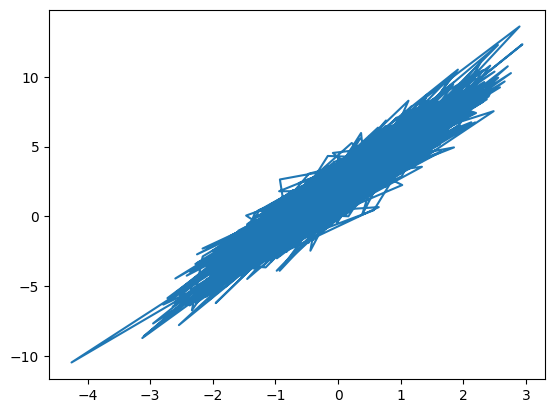

In [54]:
import matplotlib.pyplot as plt
plt.plot(training_inputs, training_outputs)

In [62]:
# 최적화할 손실함수
def loss(model, inputs, targets):
  error = model(inputs) - targets
  return tf.reduce_mean(tf.square(error)) # MSE, mean squared error
  # tf.reduce_mean : ()안의 모든 값에 대한 평균을 내줌

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, [model.W, model.B])
  # grads : W에 대한 미분값(dL/dW), B에 대한 미분값(dL/dB)

In [61]:
tf.reduce_mean([2,5,11])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [63]:
# 정의:
# 1. 모델
# 2. 모델 파라미터에 대한 손실 함수의 미분
# 3. 미분에 기초한 변수 업데이트 전략
model = Model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

print("초기 손실: {:.3f}".format(loss(model, training_inputs, training_outputs)))

초기 손실: 69.939


In [64]:
# 반복 훈련
for i in range(300):
  grads = grad(model, training_inputs, training_outputs)
  optimizer.apply_gradients(zip(grads, [model.W, model.B]))
  if i % 20 == 0:
    print("스텝 {:03d}에서 손실: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))
    # print(grads[0].numpy(), grads[1].numpy(), model.W.numpy(), model.B.numpy())

print("최종 손실: {:.3f}".format(loss(model, training_inputs, training_outputs)))
print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))

스텝 000에서 손실: 67.160
스텝 020에서 손실: 30.060
스텝 040에서 손실: 13.766
스텝 060에서 손실: 6.605
스텝 080에서 손실: 3.455
스텝 100에서 손실: 2.069
스텝 120에서 손실: 1.458
스텝 140에서 손실: 1.189
스텝 160에서 손실: 1.070
스텝 180에서 손실: 1.018
스텝 200에서 손실: 0.994
스텝 220에서 손실: 0.984
스텝 240에서 손실: 0.980
스텝 260에서 손실: 0.978
스텝 280에서 손실: 0.977
최종 손실: 0.976
W = 3.0329842567443848, B = 2.0206494331359863
